### Add some of our custom images to model


In [2]:
import os
from PIL import Image
import pillow_heif
from PIL import Image, ImageOps
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def center_crop_to_square(img: Image.Image) -> Image.Image:
    w, h = img.size
    if w == h:
        return img
    if w > h:
        left = (w - h) // 2
        return img.crop((left, 0, left + h, h))
    else:
        top = (h - w) // 2
        return img.crop((0, top, w, top + w))

# def preprocess_image(image: Image.Image) -> np.ndarray:
def preprocess_image(image: Image.Image) -> np.ndarray:
    """
    Make incoming images resemble Fashion-MNIST:
    - Convert to grayscale
    - Center-crop to square
    - Autocontrast boost
    - Invert if background is bright
    - Resize to 28x28
    - Return float64 0..255 flattened (model standardizes internally)
    """
    img = image.convert("L")
    img = center_crop_to_square(img)
    img = ImageOps.autocontrast(img)

    # Heuristic: if background is bright, invert (Fashion-MNIST background is dark)
    arr = np.asarray(img, dtype=np.float64)
    if arr.mean() > 127:
        img = ImageOps.invert(img)

    img = img.resize((28, 28), Image.Resampling.LANCZOS)
    arr = np.asarray(img, dtype=np.float64)  # keep 0..255; model standardizes
    return arr.reshape(1, -1)

In [9]:
root = "images/real-photos"
csv_output = "fashion_mnist_ourdata.csv"

rows = []

for folder_name in sorted(os.listdir(root)):
    folder_path = os.path.join(root, folder_name)
    if not os.path.isdir(folder_path):
        continue

    # label extracted as integer
    label = int(folder_name.split("-")[0])

    for file in os.listdir(folder_path):
        if not file.lower().endswith((".jpg", ".jpeg")):
            continue

        img_path = os.path.join(folder_path, file)

        try:
            img = Image.open(img_path)
            vec = preprocess_image(img)        # shape (1, 784)
            flat = vec.flatten().tolist()      # shape (784,) list of numbers

            row = [label] + flat               # prepend numeric label
            rows.append(row)

        except Exception as e:
            print("Error processing", img_path, e)


# Fashion-MNIST format: 1 label + 784 pixels
header = ["label"] + [f"pixel{i}" for i in range(784)]

with open(csv_output, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(rows)

print("DONE! CSV saved to:", csv_output)
print("Total images processed:", len(rows))

DONE! CSV saved to: fashion_mnist_ourdata.csv
Total images processed: 39


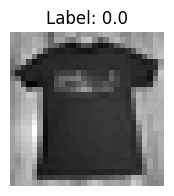

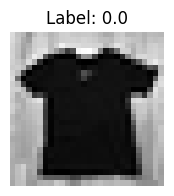

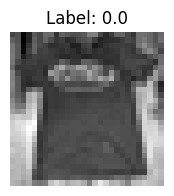

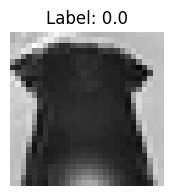

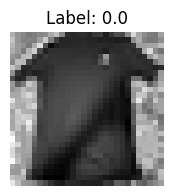

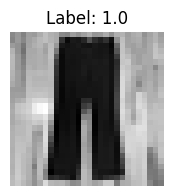

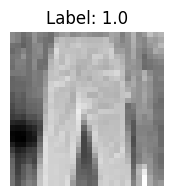

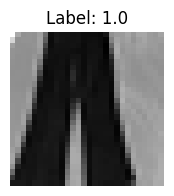

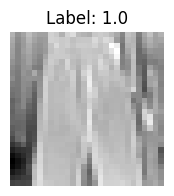

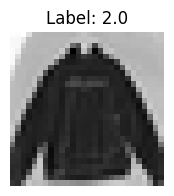

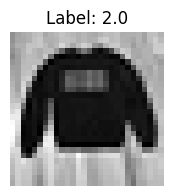

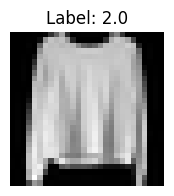

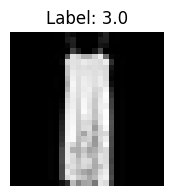

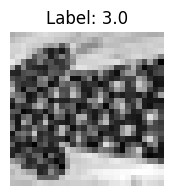

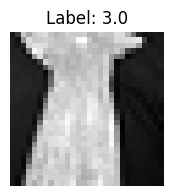

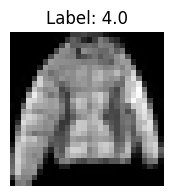

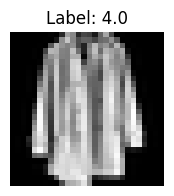

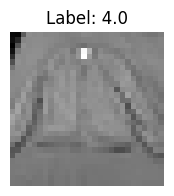

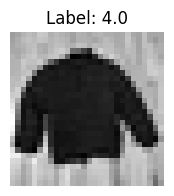

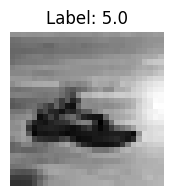

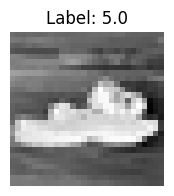

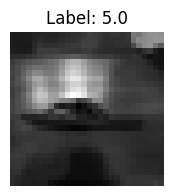

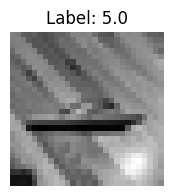

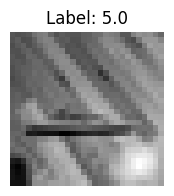

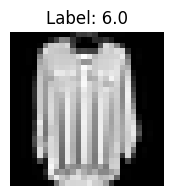

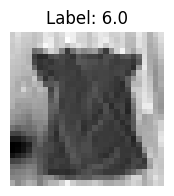

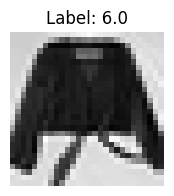

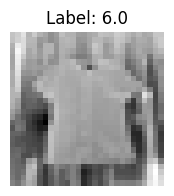

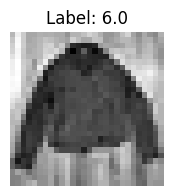

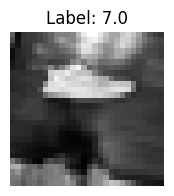

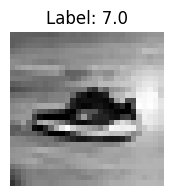

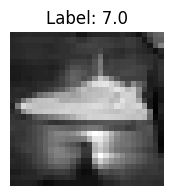

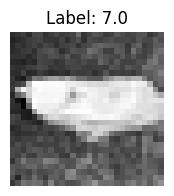

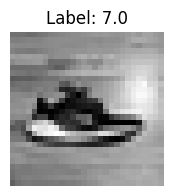

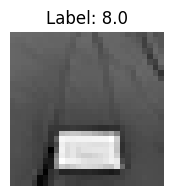

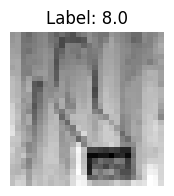

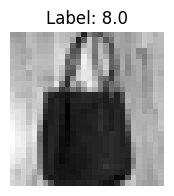

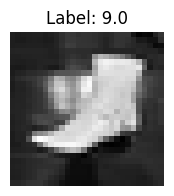

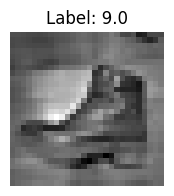

IndexError: single positional indexer is out-of-bounds

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv("fashion_mnist_ourdata.csv")

# How many images to display?
N = 50  # change to show more/less

for i in range(N):
    row = df.iloc[i]

    label = row["label"]
    pixels = row.iloc[1:].to_numpy(dtype=np.float32)  # 784 values
    
    img = pixels.reshape(28, 28)

    plt.figure(figsize=(2, 2))
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()